In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# **1.loading required files and libraries**

In [ ]:
! pip install 'fsspec>=0.3.3'
! pip install colorama
! pip install -U -q PyDrive

**1.1 loading dataset from google drive**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link1 = 'https://drive.google.com/file/d/11j64jde9EwjJTXh1_VdeY4kpAple4Zrc/view?usp=sharing'
link2 = 'https://drive.google.com/file/d/1xS-0g8KcIsrwuw-u-lJtgFnVI2K6uqDc/view?usp=sharing'
link3 = 'https://drive.google.com/file/d/14gveAyCu5tD1PYNYiYnVI4hpCRjoZXlt/view?usp=sharing'
link4 = 'https://drive.google.com/file/d/1NugLNro_YJSjtViOKL2vT8iEvzou1sj1/view?usp=sharing'

link5 = 'https://drive.google.com/file/d/1P0ujmQUbqKeny08a4HbHrPvV4_EEPg7F/view?usp=sharing'



id1 = link1.split("/")[-2]
id2 = link2.split("/")[-2]
id3 = link3.split("/")[-2]
id4 = link4.split("/")[-2]
id5 = link5.split("/")[-2]

downloaded = drive.CreateFile({'id':id1})
downloaded.GetContentFile('UNSW-NB15_1.csv') 
downloaded = drive.CreateFile({'id':id2})
downloaded.GetContentFile('UNSW-NB15_2.csv') 
downloaded = drive.CreateFile({'id':id3})
downloaded.GetContentFile('UNSW-NB15_3.csv') 
downloaded = drive.CreateFile({'id':id4})
downloaded.GetContentFile('UNSW-NB15_4.csv') 
downloaded = drive.CreateFile({'id':id5})
downloaded.GetContentFile('NUSW-NB15_features.csv') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



---



---



---



---


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from colorama import Fore
import math
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn import metrics

import time

from torch.utils.data import TensorDataset, DataLoader, IterableDataset, Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

# **2.Data preprocessing**

In [ ]:
ft = pd.read_csv('NUSW-NB15_features.csv')
ft['Name'] = ft['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
nominal_cols = list(ft[ft['Type ']=='nominal']['Name'])
categorical_columns = list(set(nominal_cols)-set(['attack_cat']))  
col_names = list(ft['Name'])


In [ ]:
df =  dd.read_csv('./UNSW-NB15_1.csv', header = None, dtype={1: 'object', 47: 'object',3:'object', 32: 'float64', 33: 'float64',
       34: 'float64',37: 'float64',       38: 'float64',       39: 'object'})
df.columns = col_names   
for i in range(2,5) :  
    print(i)    
    path = './UNSW-NB15_{}.csv'  # There are 4 input csv files
    ds = dd.read_csv(path.format(i), header = None, dtype={1: 'object',47: 'object',3:'object', 32: 'float64',
       33: 'float64',       34: 'float64',37: 'float64',       38: 'float64',       39: 'object'})
    ds.columns = col_names
    print(ds.shape)    
    df = dd.concat([df,ds],axis=0)
     
df.shape  

2
(Delayed('int-58843266-1d84-4c0f-89ec-d20690f808d8'), 49)
3
(Delayed('int-d905e00f-8c8a-4a23-b142-fce14c38fedc'), 49)
4
(Delayed('int-1861cfd7-70af-4bd1-b4c6-5eb205d87a1c'), 49)


(Delayed('int-12f1730c-1116-479d-b861-2f3d18135dfe'), 49)

In [ ]:
df.isna().sum().compute()

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

In [ ]:
df.attack_cat = df.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())
df.is_ftp_login = df.is_ftp_login.fillna(value=0)
df.ct_flw_http_mthd = df.ct_flw_http_mthd.fillna(value=0)

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:3073: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('attack_cat', 'object'))

  warnings.warn(meta_warning(meta))


In [ ]:
df = df.categorize(columns=categorical_columns)
df_j = dd.get_dummies(df[categorical_columns])
df_j

,service_dns,service_-,service_http,service_smtp,service_ftp-data,service_ftp,service_ssh,service_pop3,service_snmp,service_ssl,service_irc,service_radius,service_dhcp,state_CON,state_INT,state_FIN,state_URH,state_REQ,state_ECO,state_RST,state_CLO,state_TXD,state_URN,state_no,state_ACC,state_PAR,state_MAS,state_TST,state_ECR,proto_udp,proto_arp,proto_tcp,proto_ospf,proto_icmp,proto_igmp,proto_sctp,proto_udt,proto_sep,proto_sun-nd,proto_swipe,proto_mobile,proto_pim,proto_rtp,proto_ipnip,proto_ip,proto_ggp,proto_st2,proto_egp,proto_cbt,proto_emcon,proto_nvp,proto_igp,proto_xnet,proto_argus,proto_bbn-rcc,proto_chaos,proto_pup,proto_hmp,proto_mux,proto_dcn,proto_prm,proto_trunk-1,proto_xns-idp,proto_trunk-2,proto_leaf-1,proto_leaf-2,proto_irtp,proto_rdp,proto_iso-tp4,proto_netblt,proto_mfe-nsp,proto_merit-inp,proto_3pc,proto_xtp,proto_idpr,proto_tp++,proto_ddp,proto_idpr-cmtp,proto_ipv6,proto_il,proto_idrp,proto_ipv6-frag,proto_sdrp,proto_ipv6-route,proto_gre,proto_rsvp,proto_mhrp,proto_bna,proto_esp,proto_i-nlsp,proto_narp,proto_ipv6-no,proto_tlsp,proto_skip,proto_ipv6-opts,proto_any,proto_cftp,proto_sat-expak,proto_kryptolan,proto_rvd,proto_ippc,proto_sat-mon,proto_ipcv,proto_visa,proto_cpnx,proto_cphb,proto_wsn,proto_pvp,proto_br-sat-mon,proto_wb-mon,proto_wb-expak,proto_iso-ip,proto_secure-vmtp,proto_vmtp,proto_vines,proto_ttp,proto_nsfnet-igp,proto_dgp,proto_tcf,proto_eigrp,proto_sprite-rpc,proto_larp,proto_mtp,proto_ax.25,proto_ipip,proto_micp,proto_aes-sp3-d,proto_encap,proto_etherip,proto_pri-enc,proto_gmtp,proto_pnni,proto_ifmp,proto_aris,proto_qnx,proto_a/n,proto_scps,proto_snp,proto_ipcomp,proto_compaq-peer,proto_ipx-n-ip,proto_vrrp,proto_zero,proto_pgm,proto_iatp,proto_ddx,proto_l2tp,proto_srp,proto_stp,proto_smp,proto_uti,proto_sm,proto_ptp,proto_fire,proto_crtp,proto_isis,proto_crudp,proto_sccopmce,proto_sps,proto_pipe,proto_iplt,proto_unas,proto_fc,proto_ib,dstip_149.171.126.6,dstip_149.171.126.9,dstip_149.171.126.7,dstip_149.171.126.5,dstip_149.171.126.0,dstip_149.171.126.4,dstip_10.40.182.3,dstip_10.40.170.2,dstip_149.171.126.18,dstip_149.171.126.16,dstip_149.171.126.8,dstip_149.171.126.2,dstip_149.171.126.1,dstip_149.171.126.10,dstip_149.171.126.3,dstip_149.171.126.15,dstip_149.171.126.14,dstip_149.171.126.12,dstip_149.171.126.13,dstip_149.171.126.11,dstip_224.0.0.5,dstip_149.171.126.17,dstip_149.171.126.19,dstip_192.168.241.243,dstip_10.40.85.1,dstip_10.40.85.30,dstip_175.45.176.3,dstip_224.0.0.1,dstip_59.166.0.4,dstip_175.45.176.0,dstip_59.166.0.9,dstip_59.166.0.6,dstip_175.45.176.2,dstip_59.166.0.2,dstip_59.166.0.5,dstip_59.166.0.7,dstip_59.166.0.1,dstip_59.166.0.8,dstip_59.166.0.0,dstip_175.45.176.1,dstip_59.166.0.3,dstip_32.50.32.66,dstip_10.40.198.10,dstip_127.0.0.1,dstip_192.168.241.50,dstip_10.40.182.255,dstip_10.40.182.6,srcip_59.166.0.0,srcip_59.166.0.6,srcip_59.166.0.5,srcip_59.166.0.3,srcip_10.40.182.3,srcip_59.166.0.7,srcip_10.40.170.2,srcip_59.166.0.1,srcip_59.166.0.2,srcip_59.166.0.4,srcip_175.45.176.3,srcip_175.45.176.2,srcip_175.45.176.0,srcip_59.166.0.8,srcip_59.166.0.9,srcip_175.45.176.1,srcip_10.40.182.1,srcip_10.40.85.1,srcip_192.168.241.243,srcip_10.40.85.30,srcip_149.171.126.16,srcip_149.171.126.2,srcip_149.171.126.11,srcip_149.171.126.4,srcip_149.171.126.5,srcip_149.171.126.17,srcip_149.171.126.19,srcip_149.171.126.9,srcip_149.171.126.8,srcip_149.171.126.7,srcip_149.171.126.15,srcip_149.171.126.6,srcip_149.171.126.0,srcip_149.171.126.1,srcip_149.171.126.3,srcip_149.171.126.13,srcip_149.171.126.12,srcip_149.171.126.10,srcip_149.171.126.18,srcip_127.0.0.1,srcip_149.171.126.14,srcip_10.40.85.10,srcip_10.40.182.6
npartitions=11,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uin

In [ ]:
df = dd.concat([df_j,df],axis=1)
df = df.drop( columns=categorical_columns)
df = df.drop("attack_cat", axis=1)


/usr/local/lib/python3.7/dist-packages/dask/dataframe/multi.py:1056: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indexes of each dataframes are 
 aligned. This assumption is not generally safe.
  "Concatenating dataframes with unknown divisions.\n"


In [ ]:
df = df.persist()

In [ ]:
df = df.compute()

In [ ]:
to_be_normalized = list( set(df.columns)-set(df_j.columns)-set(categorical_columns)
-set(['attack_cat','label','stime','ltime']) )
to_be_normalized

['sbytes',
 'ct_flw_http_mthd',
 'is_sm_ips_ports',
 'sttl',
 'sintpkt',
 'dtcpb',
 'is_ftp_login',
 'stcpb',
 'dwin',
 'djit',
 'dmeansz',
 'ct_dst_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'ct_ftp_cmd',
 'res_bdy_len',
 'ct_src_ltm',
 'ct_dst_sport_ltm',
 'trans_depth',
 'dsport',
 'spkts',
 'ct_srv_src',
 'swin',
 'dload',
 'sload',
 'dbytes',
 'sloss',
 'smeansz',
 'sjit',
 'dloss',
 'ct_state_ttl',
 'sport',
 'ct_src_dport_ltm',
 'dttl',
 'dpkts',
 'ackdat',
 'dur',
 'tcprtt',
 'dintpkt',
 'synack']

In [ ]:
df[to_be_normalized] = df[to_be_normalized].astype('float32',errors='ignore')
df[to_be_normalized] = df[to_be_normalized].apply(pd.to_numeric,errors='coerce')

In [ ]:
info = df.describe()

In [ ]:
df = df.dropna(axis=0)

In [ ]:
train, test = train_test_split(df, test_size=0.30, random_state=42)

In [ ]:
del df

# **3.Data grouping**

In [ ]:

col_names = list(train.columns) 
one_hot_re={}

for j in(categorical_columns):
    B = list(train.columns)
    tem = []
    for i in col_names:
        if len(i)> len(j):
            
            if j == i[0:len(j)]:
                tem.append(i)
    one_hot_re[j] = tem
    

In [ ]:
# 'dsport'
Basic_ch = ['srcip','sport', 'dstip','proto','state','dur','sbytes','dbytes',
            'sttl','dttl','sloss','dloss','service','sload','dload','spkts','dpkts']

content_ch = ['swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len']

trafic_ch_time = ['sjit','djit','stime','ltime','sintpkt','dintpkt','tcprtt',
                  'synack','ackdat']

trafic_ch_source_addr = ['ct_srv_src',  'ct_src_ltm', 'ct_src_dport_ltm',
                         'ct_dst_src_ltm']

trafic_ch_des_addr =  ['ct_srv_dst', 'ct_dst_ltm','ct_dst_src_ltm','ct_dst_sport_ltm']

In [ ]:
def replace_one(x,categorical_columns,one_hot_re):
    y=[]
    for item in x:
        
        if item in (categorical_columns):
            V = list(one_hot_re[item])
            for j in V:
                y.append(j)           
        else:
            y.append(item)   
    
    return y

Basic_ch =  replace_one(Basic_ch,categorical_columns,one_hot_re)
content_ch = replace_one(content_ch ,categorical_columns,one_hot_re)
trafic_ch_time = replace_one(trafic_ch_time,categorical_columns,one_hot_re)
trafic_ch_source_addr = replace_one(trafic_ch_source_addr,categorical_columns,one_hot_re)
trafic_ch_des_addr = replace_one(trafic_ch_des_addr,categorical_columns,one_hot_re)
groups ={}

groups['G1'] =   Basic_ch

groups['G2'] =  Basic_ch + content_ch

groups['G3'] =  Basic_ch + content_ch + trafic_ch_time

groups['G4'] =  Basic_ch + content_ch + trafic_ch_source_addr +trafic_ch_des_addr


# **4.MLP**

In [ ]:
class Network(nn.Module):
    def __init__(self,input_len,middle_len,activation):
                        super().__init__()                        
                        self.fc1 = nn.Linear(input_len,middle_len)

                        self.fc2 = nn.Linear(middle_len,1)
                        
                        self.activation = activation
                        self.soft =  nn.Softsign()

    def forward(self,x):
                            x = self.fc1(x)
                            if self.activation == 'sigmoid':
                                x = torch.sigmoid(x)                       

                            if self.activation == 'tanh':
                                x = torch.tanh(x)

                            if self.activation == 'relu':
                                x = torch.ReLU(x)
                            if self.activation == 'Softsign':
                                 x = self.soft(x)                                     

                            x = self.fc2(x)

                            x = torch.sigmoid(x)

                            return x

In [ ]:
def train_step(train_set,optimizer,model,GGG,normal,to_be_normalized,info_ ):
    criterion = nn.BCELoss()
    print_every = 200
    steps=0  
    train_len = train_set.shape[0]
    chunk = math.floor(train_len /40000)
    df2 = train_set.copy(deep=True)

    for e in range(chunk):
        df = df2.iloc[e*40000:+(e+1)*40000, :]             
       
        if normal == 'min_max':
          df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info_[to_be_normalized ].loc['min'])/(info_[to_be_normalized ].loc['max']-info_[to_be_normalized ].loc['min'])

        if normal == 'zscore':
          df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info_[to_be_normalized ].loc['mean'])/info_[to_be_normalized ].loc['std']
        
        train_target = torch.tensor(df['label'].values.astype(np.float32))
        train = torch.tensor(df[groups[GGG]].values.astype(np.float32))
        train_target = train_target.unsqueeze(1)
        train_target = train_target.to(torch.float32)
        train_tensor = TensorDataset(train, train_target)

        train_loader = DataLoader(dataset = train_tensor, batch_size = 512)
        steps =0 
        running_loss=0        

        for X, Y in train_loader :
            steps+=1
            optimizer.zero_grad()
            output = model.forward(X)

            # 
            loss = criterion(output, Y)
            # 
            loss.backward() 
            optimizer.step()
            running_loss += loss.item()

            if steps % print_every==0:
                # print('e: ',e,'steps: ',steps,' running_loss:',running_loss)
                running_loss=0
        del df
    del df2
    return(model)


In [ ]:
def test_step(test_set,model,GGG,normal,to_be_normalized,info_):
    criterion = nn.BCELoss()
    df = test_set.copy(deep=True) 
    if normal == 'min_max':
          df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info_[to_be_normalized ].loc['min'])/(info_[to_be_normalized ].loc['max']-info_[to_be_normalized ].loc['min'])

    if normal == 'zscore':
        df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info_[to_be_normalized ].loc['mean'])/info_[to_be_normalized ].loc['std']
        
    train_target = torch.tensor(df['label'].values.astype(np.float32))
    test = torch.tensor( df[groups[GGG]].values.astype(np.float32))
    train_target = train_target.unsqueeze(1)
    predict = model(test)
    loss = criterion(predict, train_target)
    loss = loss.detach().numpy()   

    # cout_list.append()
    del df
    Y_PRED = predict.squeeze().detach().numpy()
    Y_PRED[Y_PRED>0.5] = 1
    Y_PRED[Y_PRED<0.5] = 0
    Y_TRUE = train_target.squeeze().detach().numpy()
    model_accuracy = accuracy_score(Y_TRUE ,Y_PRED)
    precision = precision_score(Y_TRUE, Y_PRED) 
    recall =  recall_score(Y_TRUE, Y_PRED)
    del Y_TRUE
    del Y_PRED
    return(model_accuracy,precision,recall,loss)

In [ ]:
final_result  = {}
MLP_result_list = []
pd.set_option('chained_assignment',None)
Activation_function =['Softsign','sigmoid','tanh','ReLU']
normalization =['zscore','min_max']

for GGG in groups.keys() :
    for rule in range(1,5):
        input_len = math.floor(len (groups[GGG]))
        if rule == 1:            
            middle_len = math.floor(0.75*len (groups[GGG]))            
        if rule == 2:            
                 middle_len = math.floor((1+len (groups[GGG]))/2)
        if rule == 3:  
                middle_len = math.floor(0.7*len (groups[GGG]))
        if rule == 4:  
                middle_len = math.floor(0.9*len (groups[GGG]))             
                
        for activation in Activation_function:
            for normal in normalization:            
      
                model = Network(input_len,middle_len,activation)
                optimizer = optim.Adam(model.parameters(), lr=0.001) 
                                 
                trained_model = train_step(train,optimizer,model,GGG,normal,to_be_normalized,info)       
                         
                model_accuracy,precision,recall,loss = test_step(test,trained_model,GGG,normal,to_be_normalized,info)
                
                
                if activation == 'ReLU':
                                n2  = str(0)
                        
                if activation == 'sigmoid':
                               n2  = str(1)                     

                if activation == 'tanh':
                                n2  = str(2)


                if activation == 'Softsign':
                                 n2  = str(3)  
                        
                model_name = 'm0' + "_"+ n2 + "_" + normal+ "_" + "R"+str(rule)  +"_"+ GGG +"_"+activation[0:4]
                
                final_result[model_name] = [model_accuracy,precision,recall,loss]
                MLP_result_list.append([model_name,model_accuracy,precision,recall,loss])
                
                print(Fore.CYAN+model_name)
                print(Fore.RED)
                print(model_accuracy,precision,recall,loss)
                print('---------------------------------------')             
                               
                del model

m0_3_zscore_R1_G1_Soft

0.99679609405731 0.8780159216166564 0.9901933701657458 0.00801939
---------------------------------------
m0_3_min_max_R1_G1_Soft

0.996651963330741 0.8779464395902752 0.9825966850828729 0.0073140077
---------------------------------------
m0_1_zscore_R1_G1_sigm

0.9963216637490203 0.8707927505856244 0.9755524861878453 0.010183257
---------------------------------------
m0_1_min_max_R1_G1_sigm

0.996348688260252 0.8694798822374877 0.9790055248618784 0.009197611
---------------------------------------
m0_2_zscore_R1_G1_tanh

0.9966459578838006 0.8710459338262029 0.9926795580110497 0.00811118
---------------------------------------
m0_2_min_max_R1_G1_tanh

0.9966459578838006 0.8772643253234751 0.9832872928176796 0.007316547
---------------------------------------
m0_0_zscore_R1_G1_ReLU

0.9965138380511124 0.8656321424275232 0.9939226519337017 0.008320235
---------------------------------------
m0_0_min_max_R1_G1_ReLU

0.9966459578838006 0.8771713687322903 0.983425

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_zscore_R1_G3_Soft

0.9782602820758428 0.0 0.0 0.10535241
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_min_max_R1_G3_Soft

0.9782602820758428 0.0 0.0 0.10575567
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_zscore_R1_G3_sigm

0.9782602820758428 0.0 0.0 0.104820386
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_min_max_R1_G3_sigm

0.9782602820758428 0.0 0.0 0.10476672
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_zscore_R1_G3_tanh

0.9782602820758428 0.0 0.0 0.105800524
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_min_max_R1_G3_tanh

0.9782602820758428 0.0 0.0 0.10588078
---------------------------------------
m0_0_zscore_R1_G3_ReLU

0.02173971792415721 0.02173971792415721 1.0 97.82603
---------------------------------------
m0_0_min_max_R1_G3_ReLU

0.02173971792415721 0.02173971792415721 1.0 97.82603
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_zscore_R2_G3_Soft

0.9782602820758428 0.0 0.0 0.10492402
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_min_max_R2_G3_Soft

0.9782602820758428 0.0 0.0 0.10512088
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_zscore_R2_G3_sigm

0.9782602820758428 0.0 0.0 0.10475401
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_min_max_R2_G3_sigm

0.9782602820758428 0.0 0.0 0.10475385
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_zscore_R2_G3_tanh

0.9782602820758428 0.0 0.0 0.10572397
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_min_max_R2_G3_tanh

0.9782602820758428 0.0 0.0 0.10482505
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_0_zscore_R2_G3_ReLU

0.9782602820758428 0.0 0.0 2.173972
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_0_min_max_R2_G3_ReLU

0.9782602820758428 0.0 0.0 2.173972
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_zscore_R3_G3_Soft

0.9782602820758428 0.0 0.0 0.105794184
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_min_max_R3_G3_Soft

0.9782602820758428 0.0 0.0 0.10563296
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_zscore_R3_G3_sigm

0.9782602820758428 0.0 0.0 0.10475953
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_min_max_R3_G3_sigm

0.9782602820758428 0.0 0.0 0.10490837
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_zscore_R3_G3_tanh

0.9782602820758428 0.0 0.0 0.10500688
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_min_max_R3_G3_tanh

0.9782602820758428 0.0 0.0 0.10572967
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_0_zscore_R3_G3_ReLU

0.9782602820758428 0.0 0.0 2.173972
---------------------------------------
m0_0_min_max_R3_G3_ReLU

0.02173971792415721 0.02173971792415721 1.0 97.82603
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_zscore_R4_G3_Soft

0.9782602820758428 0.0 0.0 0.105272844
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_3_min_max_R4_G3_Soft

0.9782602820758428 0.0 0.0 0.1051826
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_zscore_R4_G3_sigm

0.9782602820758428 0.0 0.0 0.10486315
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_1_min_max_R4_G3_sigm

0.9782602820758428 0.0 0.0 0.10479157
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_zscore_R4_G3_tanh

0.9782602820758428 0.0 0.0 0.10567581
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_2_min_max_R4_G3_tanh

0.9782602820758428 0.0 0.0 0.105821006
---------------------------------------
m0_0_zscore_R4_G3_ReLU

0.02173971792415721 0.02173971792415721 1.0 97.82603
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


m0_0_min_max_R4_G3_ReLU

0.9782602820758428 0.0 0.0 2.173972
---------------------------------------
m0_3_zscore_R1_G4_Soft

0.9969432275073492 0.8894591887831748 0.981353591160221 0.0066396543
---------------------------------------
m0_3_min_max_R1_G4_Soft

0.9967090150766745 0.8804805548674759 0.9819060773480663 0.0069234767
---------------------------------------
m0_1_zscore_R1_G4_sigm

0.9966159306490987 0.879453755431409 0.9784530386740331 0.008946045
---------------------------------------
m0_1_min_max_R1_G4_sigm

0.9963667046010731 0.8709399606299213 0.9777624309392265 0.009006867
---------------------------------------
m0_2_zscore_R1_G4_tanh

0.9967600613756677 0.8810142238713667 0.9838397790055249 0.006782619
---------------------------------------
m0_2_min_max_R1_G4_tanh

0.99663694971339 0.8782447466007417 0.981353591160221 0.007000128
---------------------------------------
m0_0_zscore_R1_G4_ReLU

0.9966639742246217 0.880825152230645 0.9790055248618784 0.00774471
----------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


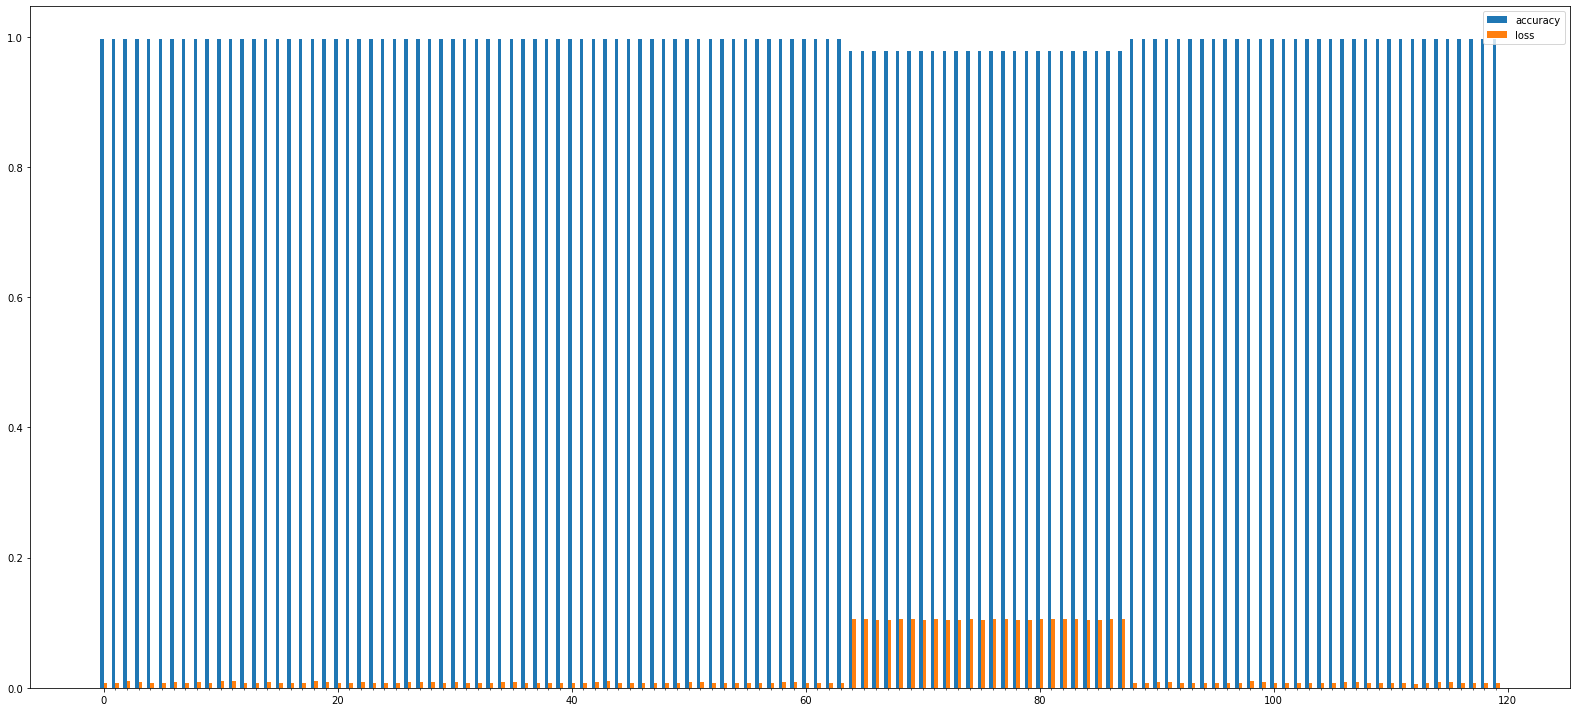

In [ ]:
labels =  []
acc = []
lss = []
for j in final_result.keys():
  if final_result[j][3] < 1:
    labels.append(j)

    acc.append(final_result[j][0])
    lss.append(final_result[j][3])



x = np.arange(len(labels))  # the label locations
width =0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(22, 10))
rects1 = ax.bar(x - width/2,acc, width, label='accuracy')
rects2 = ax.bar(x + width/2, lss, width, label='loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)

ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
MLP_result_list.sort(key = lambda x:x[1],reverse=True)
print(Fore.CYAN+'                                          top 20 models are: ')
print('.....................................................................................................................')
for i in range(20):
  print(Fore.BLUE,i,' :', Fore.RED,MLP_result_list[i] )


                                          top 20 models are: 
.....................................................................................................................
 0  :  ['m0_3_zscore_R3_G4_Soft', 0.9969612438481703, 0.8901277875219243, 0.981353591160221, array(0.00663257, dtype=float32)]
 1  :  ['m0_3_zscore_R1_G4_Soft', 0.9969432275073492, 0.8894591887831748, 0.981353591160221, array(0.00663965, dtype=float32)]
 2  :  ['m0_3_zscore_R2_G4_Soft', 0.9969372220604088, 0.8906053755337855, 0.9794198895027625, array(0.00680384, dtype=float32)]
 3  :  ['m0_3_zscore_R4_G4_Soft', 0.9969192057195877, 0.8874064837905237, 0.9830110497237569, array(0.00657739, dtype=float32)]
 4  :  ['m0_3_zscore_R2_G2_Soft', 0.9968741648675349, 0.8838390092879257, 0.9857734806629834, array(0.007955, dtype=float32)]
 5  :  ['m0_3_zscore_R3_G2_Soft', 0.9968621539736541, 0.88160650486633, 0.9883977900552486, array(0.00780501, dtype=float32)]
 6  :  ['m0_3_zscore_R1_G2_Soft', 0.9968561485267138, 0.88

In [ ]:
final_result['m0_3_zscore_R2_G3_Soft']

[0.9782602820758428, 0.0, 0.0, array(0.10492402, dtype=float32)]

# **5.LSTM**

In [ ]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers):
        
        super().__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm =  nn.LSTM(input_size, hidden_size,num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size,1)          
             
    def forward(self,x):
            h0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
            c0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
            
            out,_ = self.lstm(x,(h0,c0))
            out= out[:,-1,:]
        
            x = self.fc(out)
            
            x = torch.sigmoid(x)
           
            return x
        



In [ ]:
def train_step_lstm(train_set,optimizer,model,GGG,normal,to_be_normalized,info):
  criterion_lst = nn.BCELoss()
  print_every = 15
  steps=0

  normal = 'min_max'
  train_len = train_set.shape[0]
  chunk = math.floor(train_len /40000)
  df2 = train_set.copy(deep=True)


  for e in range(chunk):
      df = df2.iloc[e*40000:+(e+1)*40000, :]  
                
            
      if normal == 'min_max':
        df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info[to_be_normalized ].loc['min'])/(info[to_be_normalized ].loc['max']-info[to_be_normalized ].loc['min'])

      if normal == 'zscore':
        df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info[to_be_normalized ].loc['mean'])/info[to_be_normalized ].loc['std']

        
        
      #     df = df[all_imp]
      #   
        train_target = torch.tensor(df['label'].values.astype(np.float32))

        train_d = torch.tensor(df[groups['G4']].values.astype(np.float32))
        train_target = train_target.unsqueeze(1)
        

        train_target = train_target.to(torch.float32)
        train_tensor = TensorDataset(train_d, train_target)

        train_loader = DataLoader(dataset = train_tensor, batch_size = 256 )

      #     label = df['label']
      #     df = df[groups['G1']]

        running_loss=0
        del df
        for X, Y in train_loader :

          steps+=1
          optimizer_lst.zero_grad()
          X = torch.unsqueeze(X, dim=2)
          output = model.forward(X)
          
          # 
          loss = criterion_lst(output, Y)
          # test_target
          loss.backward() 
          optimizer_lst.step()
          running_loss += loss.item()

      

In [ ]:
def test_step_lstm(test_set,model,GGG,normal,to_be_normalized,info):
  df = test.copy(deep=True) 
  criterion_lst = nn.BCELoss() 
  if normal == 'min_max':
        df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info[to_be_normalized ].loc['min'])/(info[to_be_normalized ].loc['max']-info[to_be_normalized ].loc['min'])

  if normal == 'zscore':
      df.loc[:,to_be_normalized] = (df.loc[:,to_be_normalized]-info[to_be_normalized ].loc['mean'])/info[to_be_normalized ].loc['std']
      
  train_target = torch.tensor(df['label'].values.astype(np.float32))

  test_d = torch.tensor( df[groups[GGG]].values.astype(np.float32))
  train_target = train_target.unsqueeze(1)
  test_d = torch.unsqueeze(test_d, dim=2)
  predict = model2(test_d)
  loss = criterion_lst(predict, train_target)
  loss = loss.detach().numpy()


  # cout_list.append()
  del df
  Y_PRED = predict.squeeze().detach().numpy()
  Y_PRED[Y_PRED>0.5] = 1
  Y_PRED[Y_PRED<0.5] = 0
  Y_TRUE = train_target.squeeze().detach().numpy()



  model_accuracy = accuracy_score(Y_TRUE ,Y_PRED)
  precision = precision_score(Y_TRUE, Y_PRED) 
  recall =  recall_score(Y_TRUE, Y_PRED)
  del Y_TRUE
  del Y_PRED

  return(model_accuracy,precision,recall,loss)

In [ ]:
LSTM_result  = []

my_optimizers = ['SGD','RMSprop','Adam']
normalization =['zscore']


for GGG in groups.keys() :

  for opt in my_optimizers:

              
            for normal in normalization:      
                model2 = LSTM(1,1,1) 
                if opt == 'Adam':   
                  optimizer =  optim.Adam(model2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0) 
                if opt == 'RMSprop':
                  optimizer = optim.RMSprop(model2.parameters(), lr=0.01, alpha=0.99, centered=False)
                if opt == 'SGD':
                  optimizer = optim.SGD(model2.parameters(),lr=0.1)

                                 
                trained_model =  train_step_lstm(train,optimizer,model2,GGG,normal,to_be_normalized,info)       
                         
                model_accuracy,precision,recall,loss = test_step_lstm(test,trained_model,GGG,normal,to_be_normalized,info)
                
                
                        
                model_name = 'zscore' + "_"+ GGG +"_"+ str(opt)
                LSTM_result.append([model_name,model_accuracy,precision,recall,loss]) 
                
                print(Fore.CYAN+model_name)
                print(Fore.RED)
                print(model_accuracy,precision,recall,loss)
                print('---------------------------------------')             
                               
                del model2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


zscore_G1_SGD

0.9782602820758428 0.0 0.0 0.6211049
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


zscore_G1_RMSprop

0.9782602820758428 0.0 0.0 0.3947324
---------------------------------------
zscore_G1_Adam

0.02173971792415721 0.02173971792415721 1.0 0.9958252
---------------------------------------
zscore_G2_SGD

0.02173971792415721 0.02173971792415721 1.0 1.1563278
---------------------------------------
zscore_G2_RMSprop

0.02173971792415721 0.02173971792415721 1.0 0.76242316
---------------------------------------
zscore_G2_Adam

0.02173971792415721 0.02173971792415721 1.0 0.91259164
---------------------------------------
zscore_G3_SGD

0.02173971792415721 0.02173971792415721 1.0 1.1541665
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


zscore_G3_RMSprop

0.9782602820758428 0.0 0.0 0.3530308
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


zscore_G3_Adam

0.9782602820758428 0.0 0.0 0.3068382
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


zscore_G4_SGD

0.9782602820758428 0.0 0.0 0.3890796
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


zscore_G4_RMSprop

0.9782602820758428 0.0 0.0 0.6604736
---------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


zscore_G4_Adam

0.9782602820758428 0.0 0.0 0.4926523
---------------------------------------


In [ ]:
LSTM_result.sort(key = lambda x:x[1],reverse=True)
print(Fore.CYAN+'top 7 models are: ')
for i in range(7):
  print(Fore.BLUE,i,' :', Fore.RED,LSTM_result[i] )

top 7 models are: 
 0  :  ['zscore_G1_SGD', 0.9782602820758428, 0.0, 0.0, array(0.6211049, dtype=float32)]
 1  :  ['zscore_G1_RMSprop', 0.9782602820758428, 0.0, 0.0, array(0.3947324, dtype=float32)]
 2  :  ['zscore_G3_RMSprop', 0.9782602820758428, 0.0, 0.0, array(0.3530308, dtype=float32)]
 3  :  ['zscore_G3_Adam', 0.9782602820758428, 0.0, 0.0, array(0.3068382, dtype=float32)]
 4  :  ['zscore_G4_SGD', 0.9782602820758428, 0.0, 0.0, array(0.3890796, dtype=float32)]
 5  :  ['zscore_G4_RMSprop', 0.9782602820758428, 0.0, 0.0, array(0.6604736, dtype=float32)]
 6  :  ['zscore_G4_Adam', 0.9782602820758428, 0.0, 0.0, array(0.4926523, dtype=float32)]


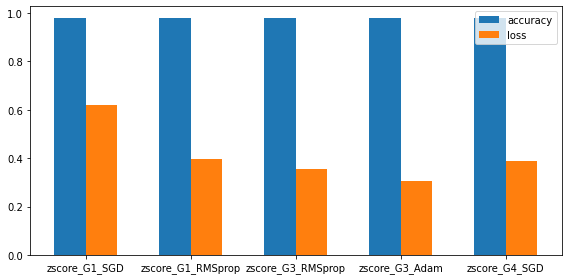

In [ ]:
x = np.arange(5)  # the label locations
width =0.3  # the width of the bars
labels = [LSTM_result[i][0] for i in range( 5)]
acc = [LSTM_result[i][1] for i in range( 5)]
lss  =  [LSTM_result[i][-1] for i in range( 5)]

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - width/2,acc, width, label='accuracy')
rects2 = ax.bar(x + width/2, lss, width, label='loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks()
ax.set_xticklabels(['']+labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()